##Datasets

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [98]:
data = 'https://raw.githubusercontent.com/DigitalSuYee/Diabetes_prediction/main/diabetes_prediction_dataset.csv'

In [99]:
!wget $data -O capstone2.csv

--2024-01-22 17:02:14--  https://raw.githubusercontent.com/DigitalSuYee/Diabetes_prediction/main/diabetes_prediction_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3810356 (3.6M) [text/plain]
Saving to: ‘capstone2.csv’

capstone2.csv       100%[===================>]   3.63M  --.-KB/s    in 0.08s   

2024-01-22 17:02:14 (46.8 MB/s) - ‘capstone2.csv’ saved [3810356/3810356]



In [100]:
df = pd.read_csv('capstone2.csv')
df.head().T

,0,1,2,3,4
gender,Female,Female,Male,Female,Male
age,80.0,54.0,28.0,36.0,76.0
hypertension,0,0,0,0,1
heart_disease,1,0,0,0,1
smoking_history,never,No Info,never,current,current
bmi,25.19,27.32,27.32,23.45,20.14
HbA1c_level,6.6,6.6,5.7,5.0,4.8
blood_glucose_level,140,80,158,155,155
diabetes,0,0,0,0,0


In [101]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [102]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [103]:
df.shape

(100000, 9)

##Features

In [104]:
df_features = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hba1c_level', 'blood_glucose_level']]
df_features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [105]:
df_features.shape

(100000, 8)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   hba1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [107]:
df_features.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
hba1c_level              18
blood_glucose_level      18
dtype: int64

In [108]:
df_features.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hba1c_level            0
blood_glucose_level    0
dtype: int64

In [109]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [110]:
data_numeric = df.copy()
data_numeric

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [111]:
columns_to_drop = ['gender', 'smoking_history']
data_numeric = df.drop(columns=columns_to_drop, axis=1)
data_numeric.describe()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [112]:
data_numeric.corr()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
hba1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


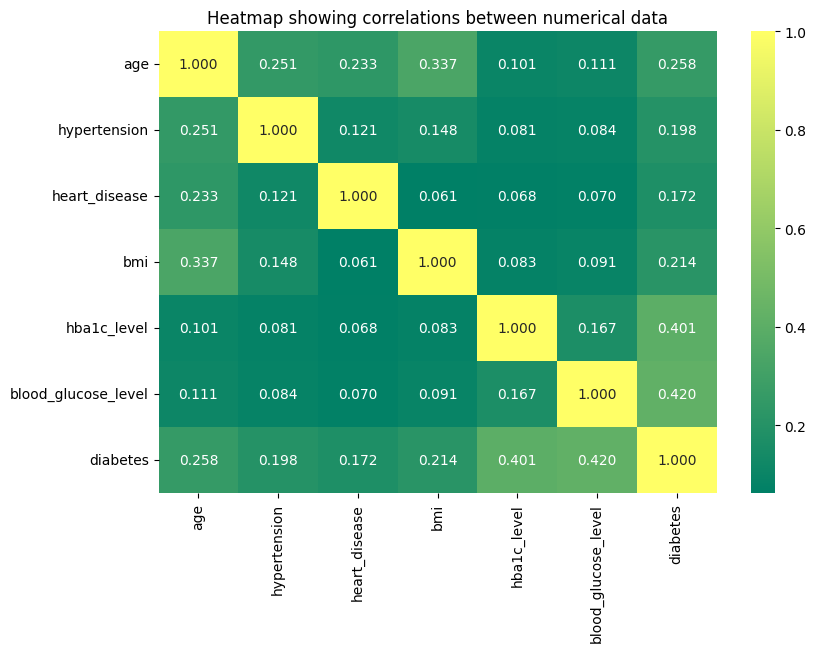

In [113]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [114]:
data_numeric.corr().unstack().sort_values(ascending = False)

age                  age                    1.000000
hypertension         hypertension           1.000000
blood_glucose_level  blood_glucose_level    1.000000
hba1c_level          hba1c_level            1.000000
heart_disease        heart_disease          1.000000
bmi                  bmi                    1.000000
diabetes             diabetes               1.000000
                     blood_glucose_level    0.419558
blood_glucose_level  diabetes               0.419558
diabetes             hba1c_level            0.400660
hba1c_level          diabetes               0.400660
bmi                  age                    0.337396
age                  bmi                    0.337396
diabetes             age                    0.258008
age                  diabetes               0.258008
                     hypertension           0.251171
hypertension         age                    0.251171
age                  heart_disease          0.233354
heart_disease        age                    0.

In [115]:
diabetes = {False: 0, True: 1}
df['diabetes'] = df['diabetes'].replace(diabetes)

In [116]:
df['diabetes'].isna().sum()

0

In [117]:
df['diabetes'] = df['diabetes'].fillna(0)

In [118]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [119]:
categorical = ['gender', 'smoking_history']

numerical = [
    'age',
    'hypertension',
    'heart_disease',
    'bmi',
    'hba1c_level',
    'blood_glucose_level',
    'diabetes'
]

##Train, Test Splitting

In [120]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [121]:
len(df_train), len(df_val), len(df_test)

(60000, 20000, 20000)

In [122]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [123]:
y_train = df_train['diabetes'].values
y_val = df_val['diabetes'].values
y_test = df_test['diabetes'].values

In [124]:
del df_train['diabetes']
del df_val['diabetes']
del df_test['diabetes']

In [125]:
df_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level
0,Female,72.0,0,0,former,27.32,4.8,155
1,Female,61.0,0,0,former,24.63,5.0,80
2,Male,6.0,0,0,never,27.32,6.1,145
3,Female,43.0,0,0,ever,34.45,5.0,90
4,Female,67.0,0,0,never,44.06,6.0,158
...,...,...,...,...,...,...,...,...
59995,Female,12.0,0,0,No Info,22.64,3.5,155
59996,Female,80.0,0,0,former,24.06,9.0,220
59997,Male,64.0,0,0,former,35.30,6.6,145
59998,Female,66.0,0,0,never,25.28,8.2,126


##Training Decision Tree with Scikit-Learn

In [126]:
X_train = df_train.copy()
X_train = pd.get_dummies(X_train, columns=categorical)

In [127]:
tree_model = DecisionTreeClassifier(random_state=42)

In [128]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [129]:
y_train_pred = tree_model.predict(X_train)

In [130]:
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

In [131]:
print(f"Accuracy on the training set: {accuracy_train:.4f}")

Accuracy on the training set: 0.9993


In [132]:
print(conf_matrix_train)

[[54902     0]
 [   40  5058]]


In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [135]:
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy', verbose=1)


In [136]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [137]:
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [138]:
best_tree_model = grid_search.best_estimator_

In [139]:
y_train_pred = best_tree_model.predict(X_train)

In [140]:
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

In [141]:
print(f"\nAccuracy on the training set with best model: {accuracy_train:.4f}")


Accuracy on the training set with best model: 0.9719


##Training logistic regression with Scikit-Learn

In [142]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

In [143]:
cat = ['gender', 'smoking_history']

In [144]:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
smoking_history,0.009779
gender,0.000640


In [145]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [146]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [147]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [148]:
accuracy = np.round(accuracy_score(y_val, y_pred),3)
print(f'Accuracy = {accuracy}')

Accuracy = 0.961


##Model Intrepretation

In [149]:
features = df_train.columns.to_list()
features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'hba1c_level',
 'blood_glucose_level']

In [150]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [151]:
scores

,eliminated_feature,accuracy,difference
0,gender,0.96055,0.00045
1,age,0.95955,0.00145
2,hypertension,0.96025,0.00075
3,heart_disease,0.96090,0.00010
4,smoking_history,0.96135,-0.00035
5,bmi,0.95880,0.00220
6,hba1c_level,0.94275,0.01825
7,blood_glucose_level,0.94625,0.01475


In [152]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
4,smoking_history,0.96135,-0.00035


##Confusion table

In [153]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [154]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [155]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [156]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[18176,   130],
       [  945,   749]])

In [157]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.91, 0.01],
       [0.05, 0.04]])

##ROC Curve

In [158]:
tpr = tp / (tp + fn)
tpr

0.44214876033057854

In [159]:
fpr = fp / (fp + tn)
fpr

0.007101496777013001

In [160]:
from sklearn.metrics import roc_curve

In [161]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

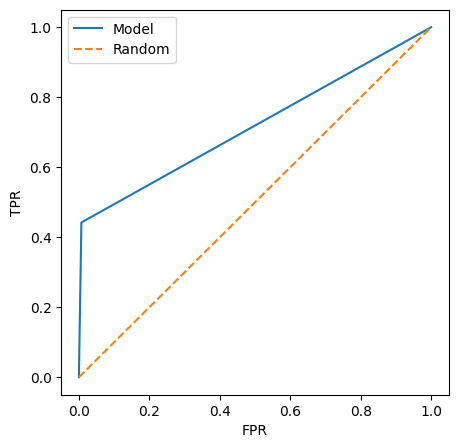

In [162]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

##AUC-ROC Curve

In [163]:
from sklearn.metrics import roc_auc_score

In [164]:
roc_auc_score(y_val, y_pred)

0.7175236317767828

In [165]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [166]:
import random

In [167]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [168]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [169]:
from sklearn.model_selection import KFold

In [170]:
from tqdm.auto import tqdm

In [171]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.diabetes.values
        y_val = df_val.diabetes.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.995 +- 0.000
C=0.01 1.000 +- 0.000
C=0.1 1.000 +- 0.000
C=0.5 1.000 +- 0.000
C=1 1.000 +- 0.000
C=5 1.000 +- 0.000
C=10 1.000 +- 0.000


In [172]:
scores

[1.0, 1.0, 1.0, 0.9999999999999999, 1.0]

In [173]:
print("Columns in df_full_train:", df_full_train.columns)
print("Columns in df_test:", df_test.columns)

Columns in df_full_train: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
Columns in df_test: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level'],
      dtype='object')


In [174]:
dv, model = train(df_full_train, df_full_train.diabetes.values, C=0.01)

##Save Model

In [175]:
import pickle

In [176]:
output_file = f'model_C={C}.bin'

In [177]:
output_file

'model_C=10.bin'

In [178]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [179]:
!ls -lh *.bin

-rw-r--r-- 1 root root 1.4K Jan 22 17:04 'model_C=10.bin'


In [180]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [181]:
input_file = '/content/model_C=10.bin'

In [182]:
with open(input_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [183]:
model

LogisticRegression(C=0.01, max_iter=1000)

In [184]:
user = {
'gender': "Female",
'age': 40.0,
'hypertension': 0,
'heart_disease': 1,
'smoking_history': "never",
'bmi': 27.32,
'hba1c_level': 5.0,
'blood_glucose_level': 145,

}

In [185]:
X = dv.transform([user])

In [186]:
print('input:', user)
print('output:', y_pred)

input: {'gender': 'Female', 'age': 40.0, 'hypertension': 0, 'heart_disease': 1, 'smoking_history': 'never', 'bmi': 27.32, 'hba1c_level': 5.0, 'blood_glucose_level': 145}
output: [1.93363767e-05 7.14724221e-06 7.19592968e-05 ... 4.97460007e-05
 1.13077028e-05 7.50410981e-06]


In [187]:
import requests

In [188]:
url = 'http://localhost:9696/predict'

In [189]:
user = {
'gender': "Female",
'age': 40.0,
'hypertension': 0,
'heart_disease': 1,
'smoking_history': "never",
'bmi': 27.32,
'hba1c_level': 5.0,
'blood_glucose_level': 145,

}

In [190]:
response = requests.post(url, json=user).json()

ConnectionError: HTTPConnectionPool(host='localhost', port=9696): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f863977b5e0>: Failed to establish a new connection: [Errno 111] Connection refused'))